In [75]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [94]:
from scipy.stats import kstest, norm, iqr

In [13]:
data = pd.read_pickle('kulich.pkl')

In [18]:
d = {'001':'Центральный АО',
    '012':'Центральный АО',
    '013':'Центральный АО',
    '014':'Центральный АО',
    '002':'Уральский АО',
    '003':'Северо-западный округ',
    '011':'Северо-западный округ',
    '005':'Северо-западный округ',
    '004':'Приволжский АО',
    '006':'Приволжский АО',
    '007':'Приволжский АО',
    '008':'Южный АО',
    '009':'Сибирский АО',
    '010':'Сибирский АО',
    '015':'Сибирский АО',
    '016':'Сибирский АО',
    '017':'Сибирский АО',
    }

In [55]:
# создаем таблицу, куда будем вписывать результаты

regs = list(set(d.values()))
pers = list(data.uI_EPI21_INFPER_MHSTDAT.unique())
index = pd.MultiIndex.from_product([pers, regs], names=["pers", "regs"])
s = pd.DataFrame(index = index)
s

Empty DataFrame
Columns: []
Index: [(Период 2 (с 2016 - по сегодняшний день), Приволжский АО), (Период 2 (с 2016 - по сегодняшний день), Северо-западный округ), (Период 2 (с 2016 - по сегодняшний день), Центральный АО), (Период 2 (с 2016 - по сегодняшний день), Сибирский АО), (Период 2 (с 2016 - по сегодняшний день), Южный АО), (Период 2 (с 2016 - по сегодняшний день), Уральский АО), (Период 1 (с 2010 по 2015 гг.), Приволжский АО), (Период 1 (с 2010 по 2015 гг.), Северо-западный округ), (Период 1 (с 2010 по 2015 гг.), Центральный АО), (Период 1 (с 2010 по 2015 гг.), Сибирский АО), (Период 1 (с 2010 по 2015 гг.), Южный АО), (Период 1 (с 2010 по 2015 гг.), Уральский АО)]

In [86]:
data['region'] = data.study_name.str[:3].apply(lambda x: d[x])

## количественные данные

### имт

In [64]:
# определим параметры нормального распределения по нашей выборке, чтобы было с чем сравнивать
loc, scale = norm.fit(data.I_EPI22_BMI_VSORRES.dropna())
# создадим нормальное распределение с этими параметрами
n = norm(loc=loc, scale=scale)
# проверяем критерий Колмогорова-Смирнова
kstest(data.I_EPI22_BMI_VSORRES.dropna(), n.cdf)

KstestResult(statistic=0.08784728803421349, pvalue=4.618282078513994e-47)

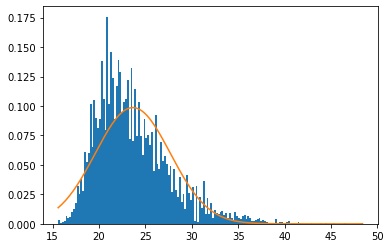

In [83]:
# pvalue < 0.05 -> не нормальное распределение. на всякий случай визуализируем

plt.hist(data.I_EPI22_BMI_VSORRES, bins=np.arange(data.I_EPI22_BMI_VSORRES.min(), data.I_EPI22_BMI_VSORRES.max()+0.2, 0.2), density=True)
x = np.arange(data.I_EPI22_BMI_VSORRES.min(), data.I_EPI22_BMI_VSORRES.max()+0.2, 0.2)
plt.plot(x, n.pdf(x))

In [112]:
# распределение не нормальное -> считаем медиану и интерквартильный размах
data_bmi = data[~data.I_EPI22_BMI_VSORRES.isna()]

s['BMI_median'] = data_bmi.groupby(by = ['uI_EPI21_INFPER_MHSTDAT', 'region'])['I_EPI22_BMI_VSORRES'].median()
s['BMI_iqr'] = data_bmi.groupby(by = ['uI_EPI21_INFPER_MHSTDAT', 'region'])['I_EPI22_BMI_VSORRES'].agg(iqr)

In [113]:
s

BMI_median  \
pers                                    regs                                
Период 2 (с 2016 - по сегодняшний день) Приволжский АО               22.7   
                                        Северо-западный округ        21.9   
                                        Центральный АО               22.6   
                                        Сибирский АО                 22.8   
                                        Южный АО                     22.3   
                                        Уральский АО                 23.5   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО               22.3   
                                        Северо-западный округ        22.9   
                                        Центральный АО               23.9   
                                        Сибирский АО                 23.0   
                                        Южный АО                     22.5   
                                        Уральский АО                 23.2   

                                                               BMI_iqr  \
pers                                    regs                             
Период 2 (с 2016 - по сегодняшний день) Приволжский АО            5.20   
                                        Северо-западный округ     4.80   
                                        Центральный АО            4.50   
                                        Сибирский АО              5.30   
                                        Южный АО                  5.00   
                                        Уральский АО              6.25   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО            5.10   
                                        Северо-западный округ     4.35   
                                        Центральный АО            4.80   
                                        Сибирский АО              5.30   
                                        Южный АО                  4.20   
                                        Уральский АО              5.20   

                                                                AGE_mean  \
pers                                    regs                               
Период 2 (с 2016 - по сегодняшний день) Приволжский АО         34.580000   
                                        Северо-западный округ  34.529138   
                                        Центральный АО         33.851135   
                                        Сибирский АО           34.399441   
                                        Южный АО               34.207071   
                                        Уральский АО           34.996825   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО         30.348889   
                                        Северо-западный округ  30.218097   
                                        Центральный АО         31.340815   
                                        Сибирский АО           30.214966   
                                        Южный АО               31.118812   
                                        Уральский АО           33.332168   

                                                                AGE_std  
pers                                    regs                             
Период 2 (с 2016 - по сегодняшний день) Приволжский АО         4.536813  
                                        Северо-западный округ  4.720428  
                                        Центральный АО         4.835915  
                                        Сибирский АО           4.646942  
                                        Южный АО               4.485989  
                                        Уральский АО           4.620984  
Период 1 (с 2010 по 2015 гг.)           Приволжский АО         4.796580  
                                        Северо-западный округ  4.812653  
                                        Центральный АО         4.184023  
                                        Сибирский АО           4.588

### возраст

In [99]:
# поскольку по дефолту у нас нет возраста, создадим колонку с ним

data_age = data[~data.I_EPI22_BRTHDAT.isna()]
d2 = {
    'Период 1 (с 2010 по 2015 гг.)':'2012-01-01',
    'Период 2 (с 2016 - по сегодняшний день)':'2019-01-01',
}
data_age['start'] = data_age.uI_EPI21_INFPER_MHSTDAT.apply(lambda x: d2[x])
data_age['start'] = pd.to_datetime(data_age['start'])
data_age['age'] = (data_age['start'] - data_age.I_EPI22_BRTHDAT).astype('timedelta64[Y]')

In [100]:
# определим параметры нормального распределения по нашей выборке, чтобы было с чем сравнивать
loc, scale = norm.fit(data_age.age)
# создадим нормальное распределение с этими параметрами
n = norm(loc=loc, scale=scale)
# проверяем критерий Колмогорова-Смирнова
kstest(data_age.age, n.cdf)

KstestResult(statistic=0.056166686547606925, pvalue=1.2022126167249293e-19)

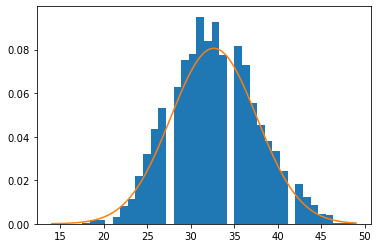

In [107]:
# pvalue < 0.05 -> не нормальное распределение. на всякий случай визуализируем

plt.hist(data_age.age, bins = 40, density=True)
x = np.arange(data_age.age.min(), data_age.age.max()+0.2, 0.2)
plt.plot(x, n.pdf(x))

In [114]:
# статистический тест оказался слишком чувствительным к отсутствующим данным (?), 
# имхо выглядит нормально -- и в критериях есть возможность определять "нормальность"
# визуально -- так и сделаем в данном случае. пусть это нормальное распределение.
# тогда ищем std и среднее


s['AGE_mean'] = data_age.groupby(by = ['uI_EPI21_INFPER_MHSTDAT', 'region'])['age'].mean()
s['AGE_std'] = data_age.groupby(by = ['uI_EPI21_INFPER_MHSTDAT', 'region'])['age'].std()
s

BMI_median  \
pers                                    regs                                
Период 2 (с 2016 - по сегодняшний день) Приволжский АО               22.7   
                                        Северо-западный округ        21.9   
                                        Центральный АО               22.6   
                                        Сибирский АО                 22.8   
                                        Южный АО                     22.3   
                                        Уральский АО                 23.5   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО               22.3   
                                        Северо-западный округ        22.9   
                                        Центральный АО               23.9   
                                        Сибирский АО                 23.0   
                                        Южный АО                     22.5   
                                        Уральский АО                 23.2   

                                                               BMI_iqr  \
pers                                    regs                             
Период 2 (с 2016 - по сегодняшний день) Приволжский АО            5.20   
                                        Северо-западный округ     4.80   
                                        Центральный АО            4.50   
                                        Сибирский АО              5.30   
                                        Южный АО                  5.00   
                                        Уральский АО              6.25   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО            5.10   
                                        Северо-западный округ     4.35   
                                        Центральный АО            4.80   
                                        Сибирский АО              5.30   
                                        Южный АО                  4.20   
                                        Уральский АО              5.20   

                                                                AGE_mean  \
pers                                    regs                               
Период 2 (с 2016 - по сегодняшний день) Приволжский АО         34.580000   
                                        Северо-западный округ  34.529138   
                                        Центральный АО         33.851135   
                                        Сибирский АО           34.399441   
                                        Южный АО               34.207071   
                                        Уральский АО           34.996825   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО         30.348889   
                                        Северо-западный округ  30.218097   
                                        Центральный АО         31.340815   
                                        Сибирский АО           30.214966   
                                        Южный АО               31.118812   
                                        Уральский АО           33.332168   

                                                                AGE_std  
pers                                    regs                             
Период 2 (с 2016 - по сегодняшний день) Приволжский АО         4.536813  
                                        Северо-западный округ  4.720428  
                                        Центральный АО         4.835915  
                                        Сибирский АО           4.646942  
                                        Южный АО               4.485989  
                                        Уральский АО           4.620984  
Период 1 (с 2010 по 2015 гг.)           Приволжский АО         4.796580  
                                        Северо-западный округ  4.812653  
                                        Центральный АО         4.184023  
                                        Сибирский АО           4.588

### количество оплодотворившихся ооцитов

In [115]:
data_oocytes = data[~data.I_EPI26_OOCFERNUM_PRDECOD.isna()]

In [116]:
# определим параметры нормального распределения по нашей выборке, чтобы было с чем сравнивать
loc, scale = norm.fit(data_oocytes.I_EPI26_OOCFERNUM_PRDECOD)
# создадим нормальное распределение с этими параметрами
n = norm(loc=loc, scale=scale)
# проверяем критерий Колмогорова-Смирнова
kstest(data_age.age, n.cdf)

KstestResult(statistic=0.9977817698023392, pvalue=0.0)

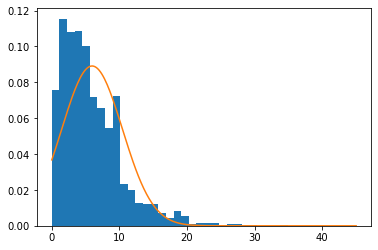

In [120]:
# pvalue < 0.05 -> не нормальное распределение. на всякий случай визуализируем

plt.hist(data_oocytes.I_EPI26_OOCFERNUM_PRDECOD, bins = 40, density=True)
x = np.arange(data_oocytes.I_EPI26_OOCFERNUM_PRDECOD.min(), data_oocytes.I_EPI26_OOCFERNUM_PRDECOD.max()+0.2, 0.2)
plt.plot(x, n.pdf(x))

In [122]:
# очевидно ненормальное распределение (сильная ассиметрия) -> интервартильный размах и медиана

s['FERT_OOCYTES_median'] = data_oocytes.groupby(by = ['uI_EPI21_INFPER_MHSTDAT', 'region'])['I_EPI26_OOCFERNUM_PRDECOD'].median()
s['FERT_OOCYTES_iqr'] = data_oocytes.groupby(by = ['uI_EPI21_INFPER_MHSTDAT', 'region'])['I_EPI26_OOCFERNUM_PRDECOD'].agg(iqr)
s

BMI_median  \
pers                                    regs                                
Период 2 (с 2016 - по сегодняшний день) Приволжский АО               22.7   
                                        Северо-западный округ        21.9   
                                        Центральный АО               22.6   
                                        Сибирский АО                 22.8   
                                        Южный АО                     22.3   
                                        Уральский АО                 23.5   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО               22.3   
                                        Северо-западный округ        22.9   
                                        Центральный АО               23.9   
                                        Сибирский АО                 23.0   
                                        Южный АО                     22.5   
                                        Уральский АО                 23.2   

                                                               BMI_iqr  \
pers                                    regs                             
Период 2 (с 2016 - по сегодняшний день) Приволжский АО            5.20   
                                        Северо-западный округ     4.80   
                                        Центральный АО            4.50   
                                        Сибирский АО              5.30   
                                        Южный АО                  5.00   
                                        Уральский АО              6.25   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО            5.10   
                                        Северо-западный округ     4.35   
                                        Центральный АО            4.80   
                                        Сибирский АО              5.30   
                                        Южный АО                  4.20   
                                        Уральский АО              5.20   

                                                                AGE_mean  \
pers                                    regs                               
Период 2 (с 2016 - по сегодняшний день) Приволжский АО         34.580000   
                                        Северо-западный округ  34.529138   
                                        Центральный АО         33.851135   
                                        Сибирский АО           34.399441   
                                        Южный АО               34.207071   
                                        Уральский АО           34.996825   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО         30.348889   
                                        Северо-западный округ  30.218097   
                                        Центральный АО         31.340815   
                                        Сибирский АО           30.214966   
                                        Южный АО               31.118812   
                                        Уральский АО           33.332168   

                                                                AGE_std  \
pers                                    regs                              
Период 2 (с 2016 - по сегодняшний день) Приволжский АО         4.536813   
                                        Северо-западный округ  4.720428   
                                        Центральный АО         4.835915   
                                        Сибирский АО           4.646942   
                                        Южный АО               4.485989   
                                        Уральский АО           4.620984   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО         4.796580   
                                        Северо-западный округ  4.812653   
                                        Центральный АО         4.184023   
                                        Сибирский АО     

### число перенесенных эмбрионов

In [123]:
data_embrios = data[~data.I_EPI26_EMBTRANUM_PRDECOD.isna()]

In [124]:
# определим параметры нормального распределения по нашей выборке, чтобы было с чем сравнивать
loc, scale = norm.fit(data_embrios.I_EPI26_EMBTRANUM_PRDECOD)
# создадим нормальное распределение с этими параметрами
n = norm(loc=loc, scale=scale)
# проверяем критерий Колмогорова-Смирнова
kstest(data_age.age, n.cdf)

KstestResult(statistic=1.0, pvalue=0.0)

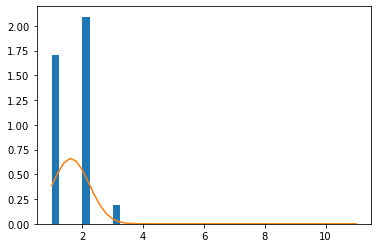

In [125]:
# pvalue < 0.05 -> не нормальное распределение. на всякий случай визуализируем

plt.hist(data_embrios.I_EPI26_EMBTRANUM_PRDECOD, bins = 40, density=True)
x = np.arange(data_embrios.I_EPI26_EMBTRANUM_PRDECOD.min(), data_embrios.I_EPI26_EMBTRANUM_PRDECOD.max()+0.2, 0.2)
plt.plot(x, n.pdf(x))

In [127]:
# распределение дискретное. с этим могут быть проблемы -- его сложно сравнивать с непрерывными. пока сделаем
# медиану и iqr, но, возможно, имеет смысл рассматривать его как-то иначе

data_embrios.I_EPI26_EMBTRANUM_PRDECOD.unique()

array([ 1.,  2.,  3.,  9.,  4., 11.,  5.])

In [128]:
#интервартильный размах и медиана

s['TRANSF_EMBRIOS_median'] = data_embrios.groupby(by = ['uI_EPI21_INFPER_MHSTDAT', 'region'])['I_EPI26_EMBTRANUM_PRDECOD'].median()
s['TRANSF_EMBRIOS_iqr'] = data_embrios.groupby(by = ['uI_EPI21_INFPER_MHSTDAT', 'region'])['I_EPI26_EMBTRANUM_PRDECOD'].agg(iqr)
s

BMI_median  \
pers                                    regs                                
Период 2 (с 2016 - по сегодняшний день) Приволжский АО               22.7   
                                        Северо-западный округ        21.9   
                                        Центральный АО               22.6   
                                        Сибирский АО                 22.8   
                                        Южный АО                     22.3   
                                        Уральский АО                 23.5   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО               22.3   
                                        Северо-западный округ        22.9   
                                        Центральный АО               23.9   
                                        Сибирский АО                 23.0   
                                        Южный АО                     22.5   
                                        Уральский АО                 23.2   

                                                               BMI_iqr  \
pers                                    regs                             
Период 2 (с 2016 - по сегодняшний день) Приволжский АО            5.20   
                                        Северо-западный округ     4.80   
                                        Центральный АО            4.50   
                                        Сибирский АО              5.30   
                                        Южный АО                  5.00   
                                        Уральский АО              6.25   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО            5.10   
                                        Северо-западный округ     4.35   
                                        Центральный АО            4.80   
                                        Сибирский АО              5.30   
                                        Южный АО                  4.20   
                                        Уральский АО              5.20   

                                                                AGE_mean  \
pers                                    regs                               
Период 2 (с 2016 - по сегодняшний день) Приволжский АО         34.580000   
                                        Северо-западный округ  34.529138   
                                        Центральный АО         33.851135   
                                        Сибирский АО           34.399441   
                                        Южный АО               34.207071   
                                        Уральский АО           34.996825   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО         30.348889   
                                        Северо-западный округ  30.218097   
                                        Центральный АО         31.340815   
                                        Сибирский АО           30.214966   
                                        Южный АО               31.118812   
                                        Уральский АО           33.332168   

                                                                AGE_std  \
pers                                    regs                              
Период 2 (с 2016 - по сегодняшний день) Приволжский АО         4.536813   
                                        Северо-западный округ  4.720428   
                                        Центральный АО         4.835915   
                                        Сибирский АО           4.646942   
                                        Южный АО               4.485989   
                                        Уральский АО           4.620984   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО         4.796580   
                                        Северо-западный округ  4.812653   
                                        Центральный АО         4.184023   
                                        Сибирский АО     

### число криоконсервированных эмбрионов

In [129]:
data_cryo = data[~data.I_EPI26_EMBCRYNUM_PRDECOD.isna()]

In [131]:
# определим параметры нормального распределения по нашей выборке, чтобы было с чем сравнивать
loc, scale = norm.fit(data_cryo.I_EPI26_EMBCRYNUM_PRDECOD)
# создадим нормальное распределение с этими параметрами
n = norm(loc=loc, scale=scale)
# проверяем критерий Колмогорова-Смирнова
kstest(data_age.age, n.cdf)

KstestResult(statistic=0.9999999987796606, pvalue=0.0)

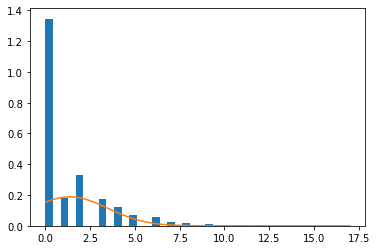

In [132]:
# pvalue < 0.05 -> не нормальное распределение. на всякий случай визуализируем

plt.hist(data_cryo.I_EPI26_EMBCRYNUM_PRDECOD, bins = 40, density=True)
x = np.arange(data_cryo.I_EPI26_EMBCRYNUM_PRDECOD.min(), data_cryo.I_EPI26_EMBCRYNUM_PRDECOD.max()+0.2, 0.2)
plt.plot(x, n.pdf(x))

In [133]:
# интервартильный размах и медиана, т.к. даже визуально распределение глубоко не нормальное

s['CRYO_EMBRIOS_median'] = data_cryo.groupby(by = ['uI_EPI21_INFPER_MHSTDAT', 'region'])['I_EPI26_EMBCRYNUM_PRDECOD'].median()
s['CRYO_EMBRIOS_iqr'] = data_cryo.groupby(by = ['uI_EPI21_INFPER_MHSTDAT', 'region'])['I_EPI26_EMBCRYNUM_PRDECOD'].agg(iqr)
s

BMI_median  \
pers                                    regs                                
Период 2 (с 2016 - по сегодняшний день) Приволжский АО               22.7   
                                        Северо-западный округ        21.9   
                                        Центральный АО               22.6   
                                        Сибирский АО                 22.8   
                                        Южный АО                     22.3   
                                        Уральский АО                 23.5   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО               22.3   
                                        Северо-западный округ        22.9   
                                        Центральный АО               23.9   
                                        Сибирский АО                 23.0   
                                        Южный АО                     22.5   
                                        Уральский АО                 23.2   

                                                               BMI_iqr  \
pers                                    regs                             
Период 2 (с 2016 - по сегодняшний день) Приволжский АО            5.20   
                                        Северо-западный округ     4.80   
                                        Центральный АО            4.50   
                                        Сибирский АО              5.30   
                                        Южный АО                  5.00   
                                        Уральский АО              6.25   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО            5.10   
                                        Северо-западный округ     4.35   
                                        Центральный АО            4.80   
                                        Сибирский АО              5.30   
                                        Южный АО                  4.20   
                                        Уральский АО              5.20   

                                                                AGE_mean  \
pers                                    regs                               
Период 2 (с 2016 - по сегодняшний день) Приволжский АО         34.580000   
                                        Северо-западный округ  34.529138   
                                        Центральный АО         33.851135   
                                        Сибирский АО           34.399441   
                                        Южный АО               34.207071   
                                        Уральский АО           34.996825   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО         30.348889   
                                        Северо-западный округ  30.218097   
                                        Центральный АО         31.340815   
                                        Сибирский АО           30.214966   
                                        Южный АО               31.118812   
                                        Уральский АО           33.332168   

                                                                AGE_std  \
pers                                    regs                              
Период 2 (с 2016 - по сегодняшний день) Приволжский АО         4.536813   
                                        Северо-западный округ  4.720428   
                                        Центральный АО         4.835915   
                                        Сибирский АО           4.646942   
                                        Южный АО               4.485989   
                                        Уральский АО           4.620984   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО         4.796580   
                                        Северо-западный округ  4.812653   
                                        Центральный АО         4.184023   
                                        Сибирский АО     

## бинарные данные

### соматические заболевания

In [135]:
data.I_EPI22_MHYN.isna().sum() #пропусков в данных нет!

0

In [136]:
data['somat'] = data['I_EPI22_MHYN'].replace({'Y':1, 'N':0})

In [140]:
# num_obs -- сколько всего есть наблюдений по данному периоду и региону (кол-во пациентов с Y и N)
s['SOMAT_num_obs'] = data.groupby(by = ['uI_EPI21_INFPER_MHSTDAT', 'region'])['somat'].count()
# ratio -- отношение пациентов с сом заболеваниями ко всем
s['SOMAT_ratio'] = data.groupby(by = ['uI_EPI21_INFPER_MHSTDAT', 'region'])['somat'].mean()
s

BMI_median  \
pers                                    regs                                
Период 2 (с 2016 - по сегодняшний день) Приволжский АО               22.7   
                                        Северо-западный округ        21.9   
                                        Центральный АО               22.6   
                                        Сибирский АО                 22.8   
                                        Южный АО                     22.3   
                                        Уральский АО                 23.5   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО               22.3   
                                        Северо-западный округ        22.9   
                                        Центральный АО               23.9   
                                        Сибирский АО                 23.0   
                                        Южный АО                     22.5   
                                        Уральский АО                 23.2   

                                                               BMI_iqr  \
pers                                    regs                             
Период 2 (с 2016 - по сегодняшний день) Приволжский АО            5.20   
                                        Северо-западный округ     4.80   
                                        Центральный АО            4.50   
                                        Сибирский АО              5.30   
                                        Южный АО                  5.00   
                                        Уральский АО              6.25   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО            5.10   
                                        Северо-западный округ     4.35   
                                        Центральный АО            4.80   
                                        Сибирский АО              5.30   
                                        Южный АО                  4.20   
                                        Уральский АО              5.20   

                                                                AGE_mean  \
pers                                    regs                               
Период 2 (с 2016 - по сегодняшний день) Приволжский АО         34.580000   
                                        Северо-западный округ  34.529138   
                                        Центральный АО         33.851135   
                                        Сибирский АО           34.399441   
                                        Южный АО               34.207071   
                                        Уральский АО           34.996825   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО         30.348889   
                                        Северо-западный округ  30.218097   
                                        Центральный АО         31.340815   
                                        Сибирский АО           30.214966   
                                        Южный АО               31.118812   
                                        Уральский АО           33.332168   

                                                                AGE_std  \
pers                                    regs                              
Период 2 (с 2016 - по сегодняшний день) Приволжский АО         4.536813   
                                        Северо-западный округ  4.720428   
                                        Центральный АО         4.835915   
                                        Сибирский АО           4.646942   
                                        Южный АО               4.485989   
                                        Уральский АО           4.620984   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО         4.796580   
                                        Северо-западный округ  4.812653   
                                        Центральный АО         4.184023   
                                        Сибирский АО     

### доноры спермы

In [143]:
print(data.I_EPI26_DONSPE_PROCCUR.isna().sum()) # есть 7 пропусков -- для общего объема данных это не страшно
# создадим таблицу без пропусков
data_sperm = data[~data.I_EPI26_DONSPE_PROCCUR.isna()]

7


In [145]:
# warning игнорируем, все норм))) просто меняю данные на числовые
data_sperm['I_EPI26_DONSPE_PROCCUR'].replace({'Y':1, 'N':0}, inplace = True)

C:\Users\mishka\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [148]:
# num_obs -- сколько всего есть наблюдений по данному периоду и региону (кол-во пациентов с Y и N)
s['DONOR_SPERM_num_obs'] = data_sperm.groupby(by = ['uI_EPI21_INFPER_MHSTDAT', 'region'])['I_EPI26_DONSPE_PROCCUR'].count()
# ratio -- отношение пациентов с донорами спермы ко всем
s['DONOR_SPERM_ratio'] = data_sperm.groupby(by = ['uI_EPI21_INFPER_MHSTDAT', 'region'])['I_EPI26_DONSPE_PROCCUR'].mean()
s

BMI_median  \
pers                                    regs                                
Период 2 (с 2016 - по сегодняшний день) Приволжский АО               22.7   
                                        Северо-западный округ        21.9   
                                        Центральный АО               22.6   
                                        Сибирский АО                 22.8   
                                        Южный АО                     22.3   
                                        Уральский АО                 23.5   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО               22.3   
                                        Северо-западный округ        22.9   
                                        Центральный АО               23.9   
                                        Сибирский АО                 23.0   
                                        Южный АО                     22.5   
                                        Уральский АО                 23.2   

                                                               BMI_iqr  \
pers                                    regs                             
Период 2 (с 2016 - по сегодняшний день) Приволжский АО            5.20   
                                        Северо-западный округ     4.80   
                                        Центральный АО            4.50   
                                        Сибирский АО              5.30   
                                        Южный АО                  5.00   
                                        Уральский АО              6.25   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО            5.10   
                                        Северо-западный округ     4.35   
                                        Центральный АО            4.80   
                                        Сибирский АО              5.30   
                                        Южный АО                  4.20   
                                        Уральский АО              5.20   

                                                                AGE_mean  \
pers                                    regs                               
Период 2 (с 2016 - по сегодняшний день) Приволжский АО         34.580000   
                                        Северо-западный округ  34.529138   
                                        Центральный АО         33.851135   
                                        Сибирский АО           34.399441   
                                        Южный АО               34.207071   
                                        Уральский АО           34.996825   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО         30.348889   
                                        Северо-западный округ  30.218097   
                                        Центральный АО         31.340815   
                                        Сибирский АО           30.214966   
                                        Южный АО               31.118812   
                                        Уральский АО           33.332168   

                                                                AGE_std  \
pers                                    regs                              
Период 2 (с 2016 - по сегодняшний день) Приволжский АО         4.536813   
                                        Северо-западный округ  4.720428   
                                        Центральный АО         4.835915   
                                        Сибирский АО           4.646942   
                                        Южный АО               4.485989   
                                        Уральский АО           4.620984   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО         4.796580   
                                        Северо-западный округ  4.812653   
                                        Центральный АО         4.184023   
                                        Сибирский АО     

### доноры ооцитов

In [150]:
print(data.I_EPI26_DONOOC_PROCCUR.isna().sum()) # есть 6 пропусков -- тоже для общего объема данных не страшно
# создадим таблицу без пропусков
data_don_ooc = data[~data.I_EPI26_DONOOC_PROCCUR.isna()]

6


In [151]:
# warning игнорируем, все норм))) просто меняю данные на числовые
data_don_ooc['I_EPI26_DONOOC_PROCCUR'].replace({'Y':1, 'N':0}, inplace = True)

C:\Users\mishka\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [152]:
# num_obs -- сколько всего есть наблюдений по данному периоду и региону (кол-во пациентов с Y и N)
s['DONOR_OOCYTE_num_obs'] = data_don_ooc.groupby(by = ['uI_EPI21_INFPER_MHSTDAT', 'region'])['I_EPI26_DONOOC_PROCCUR'].count()
# ratio -- отношение пациентов с донорами ооцитов ко всем
s['DONOR_OOCYTE_ratio'] = data_don_ooc.groupby(by = ['uI_EPI21_INFPER_MHSTDAT', 'region'])['I_EPI26_DONOOC_PROCCUR'].mean()
s

BMI_median  \
pers                                    regs                                
Период 2 (с 2016 - по сегодняшний день) Приволжский АО               22.7   
                                        Северо-западный округ        21.9   
                                        Центральный АО               22.6   
                                        Сибирский АО                 22.8   
                                        Южный АО                     22.3   
                                        Уральский АО                 23.5   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО               22.3   
                                        Северо-западный округ        22.9   
                                        Центральный АО               23.9   
                                        Сибирский АО                 23.0   
                                        Южный АО                     22.5   
                                        Уральский АО                 23.2   

                                                               BMI_iqr  \
pers                                    regs                             
Период 2 (с 2016 - по сегодняшний день) Приволжский АО            5.20   
                                        Северо-западный округ     4.80   
                                        Центральный АО            4.50   
                                        Сибирский АО              5.30   
                                        Южный АО                  5.00   
                                        Уральский АО              6.25   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО            5.10   
                                        Северо-западный округ     4.35   
                                        Центральный АО            4.80   
                                        Сибирский АО              5.30   
                                        Южный АО                  4.20   
                                        Уральский АО              5.20   

                                                                AGE_mean  \
pers                                    regs                               
Период 2 (с 2016 - по сегодняшний день) Приволжский АО         34.580000   
                                        Северо-западный округ  34.529138   
                                        Центральный АО         33.851135   
                                        Сибирский АО           34.399441   
                                        Южный АО               34.207071   
                                        Уральский АО           34.996825   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО         30.348889   
                                        Северо-западный округ  30.218097   
                                        Центральный АО         31.340815   
                                        Сибирский АО           30.214966   
                                        Южный АО               31.118812   
                                        Уральский АО           33.332168   

                                                                AGE_std  \
pers                                    regs                              
Период 2 (с 2016 - по сегодняшний день) Приволжский АО         4.536813   
                                        Северо-западный округ  4.720428   
                                        Центральный АО         4.835915   
                                        Сибирский АО           4.646942   
                                        Южный АО               4.485989   
                                        Уральский АО           4.620984   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО         4.796580   
                                        Северо-западный округ  4.812653   
                                        Центральный АО         4.184023   
                                        Сибирский АО     

### эко/икси

In [159]:
print(data.uI_EPI26_FER_PRTRT.isna().sum()) #15 пропусков -- незначительно
data_ivf = data[~data.uI_EPI26_FER_PRTRT.isna()]

15


In [166]:
def icsi(x):
    return (x == 'ИКСИ').sum()
def ivf(x):
    return (x != 'ИКСИ').sum()

s['NUM_icsi'] = data_ivf.groupby(by = ['uI_EPI21_INFPER_MHSTDAT', 'region'])['uI_EPI26_FER_PRTRT'].agg(icsi)
s['NUM_ivf'] = data_ivf.groupby(by = ['uI_EPI21_INFPER_MHSTDAT', 'region'])['uI_EPI26_FER_PRTRT'].agg(ivf)
s

BMI_median  \
pers                                    regs                                
Период 2 (с 2016 - по сегодняшний день) Приволжский АО               22.7   
                                        Северо-западный округ        21.9   
                                        Центральный АО               22.6   
                                        Сибирский АО                 22.8   
                                        Южный АО                     22.3   
                                        Уральский АО                 23.5   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО               22.3   
                                        Северо-западный округ        22.9   
                                        Центральный АО               23.9   
                                        Сибирский АО                 23.0   
                                        Южный АО                     22.5   
                                        Уральский АО                 23.2   

                                                               BMI_iqr  \
pers                                    regs                             
Период 2 (с 2016 - по сегодняшний день) Приволжский АО            5.20   
                                        Северо-западный округ     4.80   
                                        Центральный АО            4.50   
                                        Сибирский АО              5.30   
                                        Южный АО                  5.00   
                                        Уральский АО              6.25   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО            5.10   
                                        Северо-западный округ     4.35   
                                        Центральный АО            4.80   
                                        Сибирский АО              5.30   
                                        Южный АО                  4.20   
                                        Уральский АО              5.20   

                                                                AGE_mean  \
pers                                    regs                               
Период 2 (с 2016 - по сегодняшний день) Приволжский АО         34.580000   
                                        Северо-западный округ  34.529138   
                                        Центральный АО         33.851135   
                                        Сибирский АО           34.399441   
                                        Южный АО               34.207071   
                                        Уральский АО           34.996825   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО         30.348889   
                                        Северо-западный округ  30.218097   
                                        Центральный АО         31.340815   
                                        Сибирский АО           30.214966   
                                        Южный АО               31.118812   
                                        Уральский АО           33.332168   

                                                                AGE_std  \
pers                                    regs                              
Период 2 (с 2016 - по сегодняшний день) Приволжский АО         4.536813   
                                        Северо-западный округ  4.720428   
                                        Центральный АО         4.835915   
                                        Сибирский АО           4.646942   
                                        Южный АО               4.485989   
                                        Уральский АО           4.620984   
Период 1 (с 2010 по 2015 гг.)           Приволжский АО         4.796580   
                                        Северо-западный округ  4.812653   
                                        Центральный АО         4.184023   
                                        Сибирский АО     

In [167]:
s.to_excel('results_for_ayuna.xlsx')